<h2>Import Libs</h2>

In [182]:
# working with the data and vizualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre- processing
from sklearn.preprocessing import StandardScaler

# K-cross validation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# model evaluation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score

# seed
RSEED = 10

#saving models as plk files
from joblib import Parallel, delayed
import joblib

Printing configuration

In [117]:
#print float number with 6 digit after the decimal point
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [155]:
# helper functions

def k_cross_validation(x_features, y_label, k):
  """
  create 10 varsions of the train-test data with ratio of 90:10
  """
  # Split the dataset into 10 folds
  kf = KFold(n_splits=k, shuffle=True)
  # k-cross validation splits list
  kcv_list = []

  # Iterate through the folds
  for train_index, test_index in kf.split(x_features):
      # Split the train and test sets
      print(train_index)
      X_train, X_test = x_features.iloc[train_index,:], x_features.iloc[test_index,:]
      y_train, y_test = y_label.iloc[train_index], y_label.iloc[test_index]
      batch = [X_train, y_train, X_test, y_test]
      kcv_list.append(batch)
  return kcv_list

<h2>Data pre-processing and visualization</h2>

In [118]:
docs_df = pd.read_csv("../ClassificationModelsDatasets/Concatenated-DF.csv")

In [119]:
docs_df

,Unnamed: 0,download,httpsroyalsocietypublish,org,07,novemb,2022,philosoph,transact,royalsocietypublish,...,econophys,httpscristophm,siamasa,9861002,113716m1097717,10601083,113715m1048070,11451756006,1756007,Y-LABEL
0,0,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000465,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2,0.000000,0.000000,0.000166,0.000000,0.000000,0.000000,0.000532,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,3,0.000133,0.000000,0.000332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000000,0.000000,0.000166,0.000100,0.000066,0.000133,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,5,0.000133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000233,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
6,6,0.000000,0.000000,0.000166,0.000100,0.000066,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,7,0.000000,0.000000,0.000000,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000233,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
9,9,0.000000,0.000000,0.000499,0.000000,0.000066,0.000000,0.000798,0.000233,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [120]:
# remove first col-(number of row(irrelevant))
docs_df= docs_df.iloc[:,1:]

In [121]:
# normalazie the x-features
scaler = StandardScaler()
x_features = docs_df.iloc[:,0:30089]
x_features_scaled = scaler.fit_transform(x_features)

# concanted with the y-label
scaled_df = np.concatenate((x_features_scaled, docs_df.iloc[:,-1:]), axis=1)

<h3>Dimensionality Reduction</h3>
After we normalize our data, lets try to extract the relavant features from it by using PCA. It will also help us to visualize our data.

In [122]:
# lets choose the create 40 components
components = 40

pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(x_features_scaled)

PCA(n_components=40)

In [123]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[8.22727586 7.7149446  5.70633707 4.94381034 4.16375256 4.02787892
 3.73329709 3.29644798 3.11796034 2.97880533 2.77351905 2.51922259
 2.24536609 2.2294034  2.20608507 1.94184081 1.8612766  1.79555667
 1.74782613 1.62425601 1.5885971  1.50642104 1.44923786 1.43696864
 1.40477396 1.36759237 1.33539336 1.31954664 1.30404564 1.28202316
 1.26422262 1.23953428 1.20395799 1.18567251 1.17583822 1.14280862
 1.11213372 1.09721136 1.05292032 0.98836454]



In [124]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 8.22727586 15.94222046 21.64855753 26.59236787 30.75612043 34.78399935
 38.51729645 41.81374442 44.93170476 47.91051009 50.68402914 53.20325172
 55.44861782 57.67802122 59.88410629 61.8259471  63.6872237  65.48278037
 67.2306065  68.85486251 70.44345961 71.94988066 73.39911852 74.83608716
 76.24086112 77.60845349 78.94384685 80.26339349 81.56743913 82.84946229
 84.11368491 85.35321919 86.55717718 87.74284969 88.91868791 90.06149653
 91.17363025 92.27084161 93.32376193 94.31212647]



Text(0, 0.5, 'Explained variance (%)')

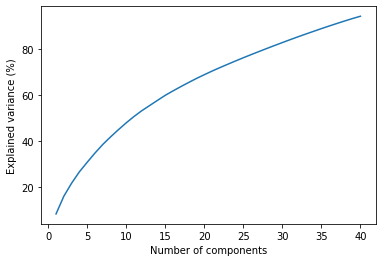

In [125]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


As we can see we can explain about 95% of the varience in the data using 40 principal components. using those 40 components we can train our model
using much less features and therefore:
- train our models much faster.
- avoid to complex model that tend to overfitting.

In [126]:
# extract 40 PC's from our x-features
X_pca = pca.transform(x_features_scaled)
print(X_pca.shape)

(50, 40)


In [127]:
# concanted with the y-label
train_test_data = np.concatenate((X_pca, docs_df.iloc[:,-1:]), axis=1)
train_test_data.shape

(50, 41)

<h3>Visualize the data using T-sne</h3>

In [ ]:
tsne = TSNE()
# transform the x- features
X_embedded = tsne.fit_transform(train_test_data[:,:40])

In [149]:
# concanted with the y-label
embedded_df = np.concatenate((X_embedded, docs_df.iloc[:,-1:]), axis=1)

In [150]:
# rename y-col
embedded_df = pd.DataFrame(embedded_df)
embedded_df.rename(columns={2: 'Category'}, inplace=True)

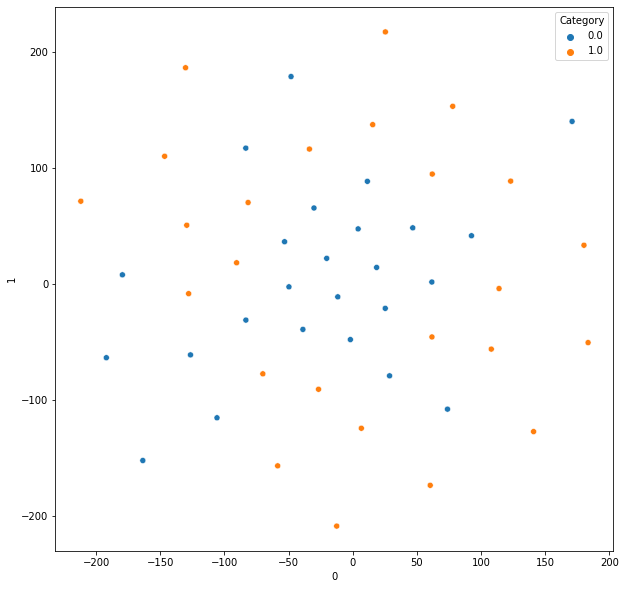

In [151]:
# create plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=embedded_df, x=0, y=1, hue='Category')

It seems like our categories(belong to explaing AI(1), not belong to explaing Ai(0)), are not linearly separated.
Yet it seems that class 0 tend to be more in area of (x(-100:50), y(-35:70))
While clas 1 tends to scatter on more lower/greater values of x,y.

<h3>K-cross validation<h3>

In [ ]:
# using k = 10
kcv_list = k_cross_validation(x_features=pd.DataFrame(train_test_data[:,:40]), y_label=docs_df.iloc[:,-1:], k=10)

<h2>Applying classification models</h2>

<h3>KNN</h3>

In [ ]:
best_classifier_knn = None
best_accu_knn = 0
best_x_test_knn = None
best_y_test_knn = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]
  # normalize x-features
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.fit_transform(x_test)

  knn = KNeighborsClassifier()

  # define parameter grid
  parameters_grid = {
      'n_neighbors': [ 3, 5, 10],
      'weights': ['uniform', 'distance']
  }

  # define grid search
  grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid)


  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_knn:
    best_accu_knn = acc
    best_classifier_knn = best
    best_x_test_knn = x_test
    best_y_test_knn = y_test

<H3>Evaluate the model</H3>

In [170]:
print("KNN best classifier accuracy is {}".format(best_accu_knn))

KNN best classifier accuracy is 0.8


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


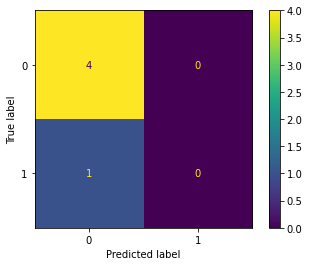

,sensitivity,specificity
0,1.000000,0.000000


In [171]:
# confusion matrix
y_pred = best_classifier_knn.predict(best_x_test_knn)
plot_confusion_matrix(best_classifier_knn, best_x_test_knn, best_y_test_knn)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_knn, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>SVM</h3>

In [ ]:
best_classifier_SVM = None
best_accu_SVM = 0
best_x_test_SVM = None
best_y_test_SVM = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]
  # normalize x-features
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.fit_transform(x_test)

  clf = svm.SVC(random_state=RSEED)

  # define parameter grid
  parameters_grid = {
      'C': [0.1, 0.5,0.7,1.2,1.5,20,40,60],
      'kernel': ['linear', 'poly','rbf', 'sigmoid'],
      'degree': [3,4],

  }

  # define grid search
  grid_search = GridSearchCV(estimator=clf, param_grid=parameters_grid)



  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_SVM:
    best_accu_SVM = acc
    best_classifier_SVM = best
    best_x_test_SVM = x_test
    best_y_test_SVM = y_test

<H3>Evaluate the model</H3>

In [177]:
print("SVM best classifier accuracy is {}".format(best_accu_SVM))

SVM best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


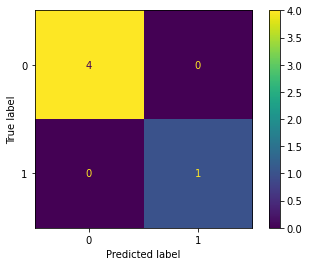

,sensitivity,specificity
0,1.000000,1.000000


In [178]:
# confusion matrix
y_pred = best_classifier_SVM.predict(best_x_test_SVM)
plot_confusion_matrix(best_classifier_SVM, best_x_test_SVM, best_y_test_SVM)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_SVM, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Random Forest</h3>

In [ ]:
best_classifier_RF = None
best_accu_RF = 0
best_x_test_RF = None
best_y_test_RF = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]

  # define model
  rf = RandomForestClassifier(random_state=RSEED)

  # define parameter grid
  parameters_grid = {
      'max_depth': [2, 3, 4, 6],
      'min_samples_split': [2, 4, 8],
      'min_samples_leaf': [2, 8],
      'n_estimators': [50,70,100]
  }
   # define grid search
  grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid)



  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_RF:
    best_accu_RF = acc
    best_classifier_RF = best
    best_x_test_RF = x_test
    best_y_test_RF = y_test

<h3>Evaluate the model</h3>

In [180]:
print("Random forest best classifier accuracy is {}".format(best_accu_RF))

Random forest best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


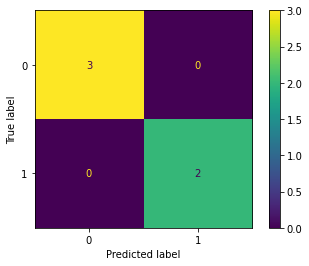

,sensitivity,specificity
0,1.000000,1.000000


In [181]:
# confusion matrix
y_pred = best_classifier_RF.predict(best_x_test_RF)
plot_confusion_matrix(best_classifier_RF, best_x_test_RF, best_y_test_RF)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_RF, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Navie Bayes</h3>

In [ ]:
best_classifier_NB = None
best_accu_NB = 0
best_x_test_NB = None
best_y_test_NB = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]

  # define parameter grid
  param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
  }

  # define and train the model
  grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, n_jobs=-1)
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_NB:
    best_accu_NB = acc
    best_classifier_NB = best
    best_x_test_NB = x_test
    best_y_test_NB = y_test

<h3>Evaluate the model</h3>

In [185]:
print("Navie Bayes best classifier accuracy is {}".format(best_accu_NB))

Navie Bayes best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


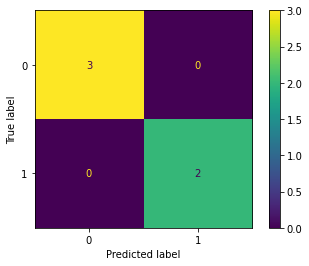

,sensitivity,specificity
0,1.000000,1.000000


In [186]:
# confusion matrix
y_pred = best_classifier_RF.predict(best_x_test_NB)
plot_confusion_matrix(best_classifier_NB, best_x_test_NB, best_y_test_NB)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_NB, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Summery</h3>
Overall it seems that most of the classifiers managed to learn well from<br>
our representaion of the data and achived best accuracy, beside the KNN classifier.<br>
However the SVM model training time was the lowest from all of the above<be> 
therefore we can consider him the best one.

In [187]:
# saving the best classifiers of all the 4 models
joblib.dump(best_classifier_knn, '../TrainedClassificationModels/KNN_classifier.pkl')
joblib.dump(best_classifier_SVM, '../TrainedClassificationModels/SVM_classifier.pkl')
joblib.dump(best_classifier_RF, '../TrainedClassificationModels/RF_classifier.pkl')
joblib.dump(best_classifier_NB, '../TrainedClassificationModels/NB_classifier.pkl')

['/content/drive/MyDrive/Colab Notebooks/NB_classifier.pkl']